In [ ]:
!pip install seaborn wordcloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # We use regular expressions for data cleaning
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_colwidth', None)

from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import jaccard_score
from nltk.metrics import edit_distance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tensorflow")


In [ ]:
Quora = pd.read_csv('/kaggle/input/quora-question-pairs/train.csv.zip')

## Logistic Regression:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'processed_questions' contains preprocessed text
X = Quora[['question1', 'question2']]
y = Quora['is_duplicate']

# Combine 'question1' and 'question2' into a single string for each row
X['combined'] = X['question1'].astype(str) + ' ' + X['question2'].astype(str)

# Handle missing values by filling with an empty string
X['combined'] = X['combined'].fillna('')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X['combined'], y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Ensure the number of samples match
print(X_train_tfidf.shape, '  ', len(X_train))

# Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)

# Predictions
predictions = classifier.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, predictions))


(323432, 78154)    323432
Accuracy: 0.7562022310717554
[[44355  6448]
 [13265 16790]]


Firstly, we addressed this challenge using a **machine learning** approach, specifically **logistic regression** on **TF-IDF** vectorized data. The logistic regression model demonstrated a 75.62% accuracy on the test set, with 16,790 true positives, 6,448 false positives, 44,355 true negatives, and 13,265 false negatives. While accuracy provides an overall measure of correctness, other metrics such as precision (72.2%) and recall (55.8%) offer a more nuanced evaluation, especially in imbalanced datasets. Consideration of these metrics and further exploration of advanced models or hyperparameter tuning could enhance the model's performance.

## XGBoots classifier:

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming 'processed_questions' contains preprocessed text
X = Quora[['question1', 'question2']]
y = Quora['is_duplicate']

# Combine 'question1' and 'question2' into a single string for each row
X['combined'] = X['question1'].astype(str) + ' ' + X['question2'].astype(str)

# Handle missing values by filling with an empty string
X['combined'] = X['combined'].fillna('')
X_train, X_test, y_train, y_test = train_test_split(X['combined'], y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# XGBoost Classifier
classifier = XGBClassifier(verbose=1)

# Fit the model
classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
predictions = classifier.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, predictions))


Accuracy: 0.7529248806549754
[[45405  5621]
 [14357 15475]]


In this XGBoost evaluation, the model achieved an accuracy of approximately 75.3%. The confusion matrix reveals that out of the total instances in the test set, 45,405 were correctly classified as the negative class, while 15,475 were correctly classified as the positive class. However, there were 5,621 instances of the negative class misclassified as positive and 14,357 instances of the positive class misclassified as negative.

so in conclusion statistical machine learning models fail in detecting the fifty percent of the duplicate questions so let's try more advanced models with deep learning approach.

In [ ]:
def roc_curve__confusion_matrix(model):
    from sklearn.metrics import roc_curve, auc
    y_prob_test = model.predict_proba(X_test_tfidf)[:, 1]
    y_prob_train  = model.predict_proba(X_train_tfidf)[:, 1]
    prediction=model.predict(X_test_tfidf)
    # calculate tpr ,fpr
    fpr_test , tpr_test , thresholds = roc_curve(y_test, y_prob_test)
    fpr_train , tpr_train , thresholds1 = roc_curve(y_train, y_prob_train)

    # calculate AUC score
    roc_auc_test  = auc(fpr_test, tpr_test)
    roc_auc_train  = auc(fpr_train ,tpr_train)


    # calculate confusion matrix for test set
    confusion_matrix_test = confusion_matrix(y_test, prediction)

    # create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # plot ROC curves on the first subplot
    axs[0].plot(fpr_train, tpr_train, color='green', label='ROC curve train (AUC = %0.2f)' % roc_auc_train)
    axs[0].plot(fpr_test, tpr_test, color='blue', label='ROC curve test (AUC = %0.2f)' % roc_auc_test)
    axs[0].plot([0, 1], [0, 1], color='red', linestyle='--')
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].set_title('Receiver Operating Characteristic (ROC) Curve')
    axs[0].legend(loc="lower right")

    sns.set(font_scale=1.4)
    sns.heatmap(confusion_matrix_test, annot=True, fmt='g', cmap='Blues', ax=axs[1])
    axs[1].set_xlabel('Predicted label')
    axs[1].set_ylabel('True label')
    axs[1].set_title('Confusion Matrix (Test Set)model');

    plt.tight_layout()
    plt.show()

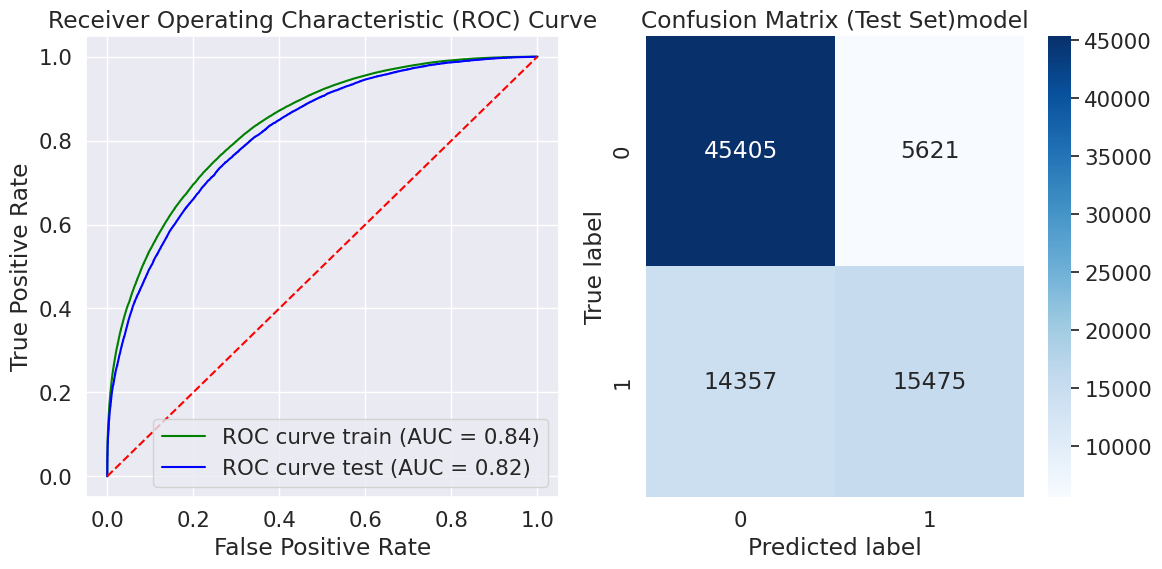

In [ ]:
roc_curve__confusion_matrix(classifier)